[![バナー画像](http://ai999.careers/bnr_jdla.png)](http://study-ai.com/jdla/)

URL: <http://study-ai.com/jdla/>

# <b>機械学習

* コンピュータプログラムは、タスクT(アプリケーションにさせたいこと)を性能指標Pで測定し、その性能が経験E(データ)により改善される場合、タスクTおよび性能指標Pに関して経験Eから学習すると言われている(トム・ミッチェル1997)
* 人がプログラムするのは認識の仕方ではなく学習の仕方(数学で記述)

## <b>第1章 線形回帰モデル

<b>要点まとめ</b>

<b>ある入力（説明変数）に対する出力（目的変数）を予測する問題であり、教師あり学習の一つに分類される。直線で予測するモデルを線形回帰、曲線で予測するモデルを非線形回帰といい、変数が1次元の場合は単回帰、多次元の場合は重回帰と呼ばれる。</b>

### <b>1.1 線形回帰モデル<b>

慣例として予測値にはハット（^）をつける。

* パラメータ（最小二乗法や最尤推定法などで求める）

$$
\mathbf{w} = (w_{1}, w_{2},  \cdots, w_{m})^{T} \in \mathbb{R}^{m}
$$

* 線形結合（入力とパラメータの内積＋接点）

$$
\hat{y} = \mathbf{w}^{T}\mathbf{x}+w_{0} = \sum_{j=1}^{m}{w}_{j}{x}_{j} + {w}_{0}
$$

* 単回帰モデル数式

$$
y = w_{0} + w_{1}x_{1} + \varepsilon
$$

* 平均二乗誤差（残差平方和）
 * データとモデル出力の二乗誤差の和
  * 小さいほど予測直線と実際のデータとの距離が近い（＝精度が良い）

* 最小二乗法
 * 学習データの平均二乗誤差を最小とするパラメータを探索する。
 * 学習データの平均二乗誤差の最小化は、その勾配が0になる点を求めればよい。

MSEをwに関して微分したものが0となるようなwの点を求める。

$$
\frac{\partial}{\partial \mathbf{w}}MSE_{train} = 0
$$

* 回帰係数

$$
\hat{\mathbf{w}} = (X^{(train)T}X^{train})^{-1}X^{(train)T}\mathbf{y}^{(train)}
$$

* 予測値

$$
\hat{\mathbf{y}} = X(X^{(train)T}X^{train})^{-1}X^{(train)T}{\mathbf{y}^{train}}
$$

<b>★★★POINT!★★★<br>
線形回帰の場合、最小二乗法による解と最尤法による解が一致することに注意すること！

### <b>1.2 データの分割とモデルの汎化性能測定<b>

* データの分割
 * 学習用データ：機械学習モデルの学習に利用するデータ
 * 検証用データ：学習済みモデルの精度を検証するためのデータ
<br><br>
* モデルの汎化性能（Generalization）（⇒未知のデータに対する当てはまりの良さ、説明能力）を測定するため、データを上記2つの区分に予め分割する。<br>
 * 学習データを利用して推定パラメータを学習。
 * 検証データを利用してモデルの精度を検証。

### <b>線形回帰モデルハンズオン

* 設定
 * ボストンの住宅データセットを線形回帰モデルで分析
 * 適切な査定結果が必要（高すぎても安すぎても会社に損害がある）

* 課題
 * 部屋数が4で犯罪率が0.3の物件はいくらになるか？

#### <b>モジュールインポートおよびデータ読み込み

In [9]:
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.datasets import load_boston
from pandas import DataFrame
from sklearn import linear_model
from scipy import stats

boston = load_boston()
dframe = DataFrame(boston.data)
dframe.columns = boston.feature_names

はじめの5行を確認（'CRIM'が犯罪率、'RM'が部屋数）

In [8]:
dframe.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### <b>線形単回帰分析

部屋数'RM'を説明変数Xに、住宅価格'PRICES'を目的変数Yに設定

In [6]:
X = 'RM'
Y = 'PRICES'
X_training = DataFrame(dframe[X])
Y_training = DataFrame(boston.target)
model = linear_model.LinearRegression()
model.fit(X_training, Y_training)

LinearRegression()

<b>（参考）95％, 99％信頼区間の計算</b>

In [10]:
x = np.array(range(math.floor(min(dframe[X])*0.9), math.ceil(max(dframe[X])*1.1)))
Ve = float(np.var(DataFrame(boston.target) - model.predict(DataFrame(dframe[X]))))
A = 1 + (1/len(dframe[X])) + ((x - np.mean(dframe[X]))**2) / (sum(((dframe[X]) - np.mean(dframe[X]))**2))
SE = np.sqrt(A * Ve)
coef = float(model.coef_)
intercept = float(model.intercept_)
Fitcurve = intercept + coef * x
alpha95 = 0.95
alpha99 = 0.99
t95 = stats.t.ppf(1-(1-alpha95)/2, len(dframe[X])-2)
t99 = stats.t.ppf(1-(1-alpha99)/2, len(dframe[X])-2)
Lower95 = Fitcurve - t95 * SE
Upper95 = Fitcurve + t95 * SE
Lower99 = Fitcurve - t99 * SE
Upper99 = Fitcurve + t99 * SE

グラフ表示

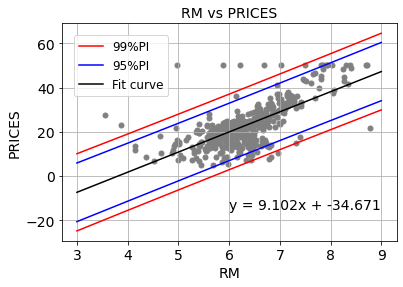

In [25]:
plt.title(X + ' vs ' + Y, fontsize = 14)
plt.xlabel(X, fontsize = 14)
plt.ylabel(Y, fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid(True)
plt.plot(x, Lower99, color = 'red', label = str(round(alpha99*100)) + '%PI')
plt.plot(x, Lower95, color = 'blue', label = str(round(alpha95*100)) + '%PI')
plt.plot(x, Fitcurve, color = 'black', label  = 'Fit curve')
plt.legend(bbox_to_anchor = (0, 1), loc = 'upper left', borderaxespad = 1, fontsize = 12)
plt.plot(x, Upper95, color = 'blue')
plt.plot(x, Upper99, color = 'red')
plt.scatter(X_training, Y_training, color = 'gray', s =25)
plt.text(6, -15, 'y = %.3fx + %.3f' % (model.coef_,model.intercept_), fontsize = 14)
plt.show()

#### <b>重回帰分析（2変数）

犯罪率'CRIM'と部屋数'RM'の先頭5行を確認

In [12]:
dframe[['CRIM', 'RM']].head()

,CRIM,RM
0,0.00632,6.575
1,0.02731,6.421
2,0.02729,7.185
3,0.03237,6.998
4,0.06905,7.147


In [21]:
df = DataFrame(data=boston.data, columns = boston.feature_names)
df['PRICE'] = np.array(boston.target)
data2 = df.loc[:, ['CRIM', 'RM']].values
target2 = df.loc[:, 'PRICE'].values

In [23]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(data2, target2)
model2.predict([[0.2, 7]])

array([29.43977562])

* 単回帰の回帰係数と切片を出力

In [24]:
print('推定された回帰係数: %.3f, 推定された切片 : %.3f' % (model.coef_, model.intercept_))

推定された回帰係数: 9.102, 推定された切片 : -34.671


* 重回帰の回帰係数と切片を出力

In [36]:
print(model2.coef_)
print(model2.intercept_)

[-0.26491325  8.39106825]
-29.24471945192992


#### <b>モデルの検証

In [30]:
from sklearn.model_selection import train_test_split
# 70%を学習用、30%を検証用データにするよう分割
data = df.loc[:, ['RM']].values
target = df.loc[:, 'PRICE'].values
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 666)
# 学習用データでパラメータ推定
model.fit(X_train, y_train)
# 作成したモデルから予測（学習用、検証用モデル使用）
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

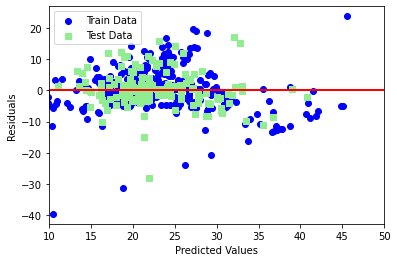

In [31]:
# matplotlibをインポート
import matplotlib.pyplot as plt
# Jupyterを利用していたら、以下のおまじないを書くとnotebook上に図が表示
%matplotlib inline
# 学習用、検証用それぞれで残差をプロット
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', label = 'Test Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# 凡例を左上に表示
plt.legend(loc = 'upper left')
# y = 0に直線を引く
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([10, 50])
plt.show()

In [32]:
# 平均二乗誤差を評価するためのメソッドを呼び出し
from sklearn.metrics import mean_squared_error
# 学習用、検証用データに関して平均二乗誤差を出力
print('MSE Train : %.3f, Test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
# 学習用、検証用データに関してR^2を出力
print('R^2 Train : %.3f, Test : %.3f' % (model.score(X_train, y_train), model.score(X_test, y_test)))

MSE Train : 44.983, Test : 40.412
R^2 Train : 0.500, Test : 0.434


<b>【参考図書】</b>

* 統計学入門, 東京大学教養学部統計学教室 編（1991）, 第13章 回帰分析

## <b>第2章 非線形回帰モデル

<b>要点まとめ</b>

<b>現実で取り扱う様々な複雑な非線形構造を内在する現象に対しては、非線形回帰モデリングを実施する必要がある。説明変数を線形写像によって非線形化してからパラメータと線形結合を行うことにより線形回帰のように取り扱える状態に変換する。基底展開法、よく使われる基底関数は以下の通り。

### <b>2.1 非線形回帰

* 基底展開法
 * 回帰関数として、基底関数と呼ばれる既知の非線形関数とパラメータベクトルの線型結合を使用
 * 未知パラメータは線形回帰モデルと同様に最小二乗法や最尤法により推定

* よく使われる基底関数
 * 多項式関数
 * ガウス型基底関数
 * スプライン関数 / Bスプライン関数

### <b>2.2 正則化法

* 未学習（underfitting）と過学習（overfitting）
 * 未学習・・・学習データに対して十分小さな誤差が得られないモデル→表現力の高いモデルを利用することにより改善する。
 * 過学習・・・小さな誤差は得られたが、テスト集合誤差との差が大きいモデル→学習データを増やす、不要な基底関数を削除して表現力を抑止する、正則化法を利用して表現力を抑止するなどの対策を取る。

* 不要な基底関数を削除
 * 基底関数の数、位置やバンド幅によりモデルの複雑さが変化
 * 解きたい問題に対して多くの基底関数を用意してしまうと過学習の問題がおこるため、適切な基底関数を用意(CVなどで選択)

* 正則化法(罰則化法)
 * 「モデルの複雑さに伴って、その値が大きくなる正則化項(罰則項)を課した関数」を最小化
 * 正則化項(罰則項)
   * 形状によっていくつもの種類があり、それぞれ推定量の性質が異なる(次スライド)
 * 正則化(平滑化)パラメータ
   * モデルの曲線のなめらかさを調節

* 正則化項の役割（パラメータを制約する）
 * L2ノルムを使用＝Ridge推定：MSEの値をパラメータ空間の原点に近い所(0)に近づける
 * L1ノルムを使用＝Lasso推定：MSEの値をパラメータの一部を0になるように近づける→次元削減

### <b>2.3 モデル選択

* 適切なモデル（汎化性能が高いモデル）は交差検証法で決定

* 汎化性能
 * 学習に使用した入力だけでなく、これまで見たことのない新たな入力に対する予測性能
   * (学習誤差ではなく)汎化誤差(テスト誤差)が小さいものが良い性能を持ったモデル。
   * 汎化誤差は通常、学習データとは別に収集された検証データでの性能を測ることで推定

* ホールドアウト法
 * 有限のデータを学習用とテスト用の2つに分割し、「予測精度」や「誤り率」を推定する為に使用
   * 学習用を多くすればテスト用が減り学習精度は良くなるが、性能評価の精度は悪くなる
   * 逆にテスト用を多くすれば学習用が減少するので、学習そのものの精度が悪くなることになる。
   * 手元にデータが大量にある場合を除いて、良い性能評価を与えないという欠点がある。
 * 基底展開法に基づく非線形回帰モデルでは、基底関数の数、位置、バンド幅の値とチューニングパラメータをホールドアウト値を小さくするモデルで決定する

* クロスバリデーション（交差検証）
 * すべてのデータを訓練データ、テストデータに使用可

<b>【参考図書】</b>

* 統計学入門, 東京大学教養学部統計学教室 編（1991）, 第13章 回帰分析

## <b>第3章 ロジスティック回帰モデル

<b>要点まとめ</b>

<b>ロジスティック回帰は、回帰という名前がつけられているが「分類」のタスクを扱うモデルである。被説明変数が質的データである場合、第1, 2章で行った回帰分析のような説明変数と被説明変数との間の線形・非線形関係が存在せず、説明変数が「1単位」変化した際に被説明変数がどのぐらい変化したのかを把握することが困難である。ロジスティック分析では、最小二乗法ではない最尤推定法を用いて、ある事象が発生する確率をシグモイド関数を用いて予測している。

### <b>3.1 ロジスティック回帰

* ロジスティック回帰モデルは分類問題を解くモデルで、教師あり学習の一つに分類される。
* 出力関数にシグモイド関数を適用しており、シグモイド関数のパラメータで勾配を調整する。
* 出力結果を確率で表し、結果が0.5以上なら1、それ未満なら0として分類問題を推定する。

* 説明変数

$$
\boldsymbol{x} = (x_{1}, x_{2}, \cdots , x_{m})^{T} \in \mathbb{R}^{m}
$$

* 目的変数（0か1の出力値を取る）

$$
y \in \bigl\{ {0, 1} \bigr\}
$$

* シグモイド関数（aが大きいほどステップ関数に近い形になる）

$$
\sigma(x) = \frac{1}{1+exp(-ax)}
$$

* シグモイド関数の微分（シグモイド関数自身で表現することが可能）

$$
\frac{\partial \sigma(x)}{\partial x} = a \sigma(x)(1- \sigma(x))
$$

* シグモイド関数の出力をY=1になる確率に対応させる

$$
P(Y=1|x) = \sigma(w_{0} + w_{1}x_{1} + \cdots + w_{m}x_{m})
$$

### <b>3.2 最尤推定

* ロジスティック回帰モデルではベルヌーイ分布を利用する。
* 尤度・・・結果から分布のパラメータがどれほど有り得るかを表したもの。一般的には対数を取った対数尤度が用いられることが多い。
* 最尤推定とは尤も有り得そうなパラメータを推定する手法（既知データに最もフィットする分布形を推定する）。

* 尤度関数（パラメータのみに依存する関数。それぞれの確立の総積で与えられる（ベルヌーイ試行は個々の事象が独立しているので積をとっても問題ない））

$$
P(y_{1}, y_{2}, \cdots ,y_{n};p) = \prod_{i=1}^{n} p^{y_{i}}(1-p)^{1-y_{i}}
$$

* 尤度関数Eを最大とするパラメータを探索する。

$$
P(y_{1}, y_{2}, \cdots ,y_{n};w_{0}, w_{1}, \cdots , w_{m}) = \prod_{i=1}^{n} p^{y_{i}}(1-p)^{1-y_{i}} = \prod_{i=1}^{n} (\boldsymbol{w}^{T}\boldsymbol{x}_{i})^{y_{i}}(1-\sigma(\boldsymbol{w}^{T}\boldsymbol{x}_{i}))^{1-y_{i}} = L(\boldsymbol{w})
$$

* 対数尤度関数を使えば微分が簡単になるとともに、同時確率の積を和に変換できるので計算が楽になる。
* 対数尤度関数を目的関数として最適化問題を解いても尤度関数を目的関数としていることと同義なので問題ない。
* 対数尤度関数を最大化させる最適化問題を解くが、最小二乗法と合わせる形で「尤度関数にマイナスをかけたものを最小化させる」問題に変換することもしばしば行われる。

### <b>3.3 勾配降下法

* 勾配降下法・・・学習によりパラメータを更新し、最適値を求める手法。最尤法では解析的にパラメータを求めるのが困難なことが多いため、勾配降下法により求められることが多い。
* 勾配降下法ではパラメータを更新するのにN個すべてのデータに対する和を求める必要があり、メモリ容量不足や計算時間増大などの課題がある。

### <b>3.4 確率的勾配法

* 確率的勾配法・・・ランダムに（「確率的」に）データを１つ選び更新する。勾配降下法ではN個のデータにつき1回更新するところを、確率的勾配法では1個のデータにつき１回で更新できる（ロジスティック回帰の場合、尤度関数が凸な関数になるということが保証されている）。
* ミニバッチ勾配降下法・・・一定数のデータの集まりを１つの学習単位として更新する。データ１個の計算よりも高速に計算することが可能。

### <b>3.5 モデルの評価

* 分類モデルの性能評価は混合行列により与えられる。

| 検証用データの結果 | | positive | negative |
| --- | --- | --- | --- |
| モデルの予測結果 | positive | 真陽性（TP） | 偽陽性（FP） |
|  | negative | 偽陰性（FN） | 真陰性（TN） |

 * 正解率（Accuracy）：予測に対する結果が正しいかどうかの指標

$$
Accuracy = \frac{TP+TN}{TP+FN+FP+TN}
$$

 * 適合率（Precision）：見逃しを許容し、誤判定を許容しない場合の指標

$$
Precision = \frac{TP}{TP+FP}
$$

 * 再現率（Recall）：見逃しを許容せず、誤判定を許容する場合の指標（PCR検査による陽性判定など）

$$
Recall = \frac{TP}{TP+FN}
$$

 * F値：適合率と再現率はトレードオフのため、見逃しと誤判定の最適値を適用する際の指標

$$
F = 2 * \frac{Recall * Precision}{Recall + Precision}
$$

### <b>ロジスティック回帰モデルハンズオン

#### <b>a. タイタニックデータ解析

* 設定
 * タイタニックの乗客データを利用しロジスティック回帰モデルを作成
 * 特徴量を抽出する
<br><br>
* 課題
 * 30歳男性の乗客は生き残れるか？

| | |
| --- | --- |
| データセット名 | タイタニックデータ |
| レコード数 | 891/471 |
| カラム数 | 11 |
| 詳細 | kaggle |
| 備考 | 分類アルゴリズムでよく利用される |

* まずは2変量（Fare（運賃）を入力データ、Survived（生死情報）をラベル）に絞って分析する。

#### <b>0. モジュールインポート～データ読み込み～不要データドロップ～欠損値補完

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#matplotlibをinlineで表示するためのおまじない (plt.show()しなくていい)
%matplotlib inline

* <b>csvファイルを読み込んで先頭5行を表示し中身を確認

In [15]:
titanic_df = pd.read_csv('titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* <b>不要なデータの削除・欠損値の補完

In [16]:
#予測に不要と考えるカラムをドロップ (本当はしっかり使うべき)
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [17]:
#一部カラムをドロップしたデータを表示
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
#nullを含んでいる行を表示
titanic_df[titanic_df.isnull().any(1)].head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,NaN,0,0,8.4583,Q
17,1,2,male,NaN,0,0,13.0000,S
19,1,3,female,NaN,0,0,7.2250,C
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
31,1,1,female,NaN,1,0,146.5208,C
32,1,3,female,NaN,0,0,7.7500,Q
36,1,3,male,NaN,0,0,7.2292,C
42,0,3,male,NaN,0,0,7.8958,C


In [19]:
#Ageカラムのnullを平均値（mean）で補完
titanic_df['AgeFill'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

In [20]:
#再度nullを含んでいる行を表示 (Ageのnullは補完されている)
titanic_df[titanic_df.isnull().any(1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill
5,0,3,male,NaN,0,0,8.4583,Q,29.699118
17,1,2,male,NaN,0,0,13.0000,S,29.699118
19,1,3,female,NaN,0,0,7.2250,C,29.699118
26,0,3,male,NaN,0,0,7.2250,C,29.699118
28,1,3,female,NaN,0,0,7.8792,Q,29.699118
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,29.699118
863,0,3,female,NaN,8,2,69.5500,S,29.699118
868,0,3,male,NaN,0,0,9.5000,S,29.699118
878,0,3,male,NaN,0,0,7.8958,S,29.699118


#### <b>1. ロジスティック回帰

* <b>実装➀（チケット価格から生死を判別）

In [21]:
#運賃だけのリストを作成
data1 = titanic_df.loc[:, ["Fare"]].values

In [22]:
#生死フラグのみのリストを作成
label1 =  titanic_df.loc[:,["Survived"]].values

In [31]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

* <b>LogisticRegressionにデータとラベルを与えるだけで簡便に学習を行わせることが可能。

In [32]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(data1, label1)

LogisticRegression()

* <b>予測モデルの試行。運賃が61ドルだった人は0（dead）で予測される。

In [24]:
model.predict([[61]])

array([0], dtype=int64)

* <b>予測モデルにおける生存確率の確認。運賃が62ドルだった人は0（dead）が約49.98％、1（alive）が約50.02％で予測されていることが分かる。

In [25]:
model.predict_proba([[62]])

array([[0.49978123, 0.50021877]])

In [26]:
X_test_value = model.decision_function(data1) 

In [27]:
print (model.intercept_)
print (model.coef_)

[-0.94131796]
[[0.01519666]]


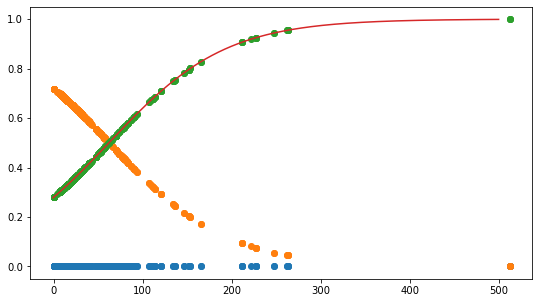

In [29]:
w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]
# def normal_sigmoid(x):
#     return 1 / (1+np.exp(-x))
def sigmoid(x):
    return 1 / (1+np.exp(-(w_1*x+w_0)))

x_range = np.linspace(-1, 500, 3000)
plt.figure(figsize=(9,5))
#plt.xkcd()
# plt.legend(loc=2)
# plt.ylim(-0.1, 1.1)
# plt.xlim(-10, 10)
# plt.plot([-10,10],[0,0], "k", lw=1)
# plt.plot([0,0],[-1,1.5], "k", lw=1)
plt.plot(data1,np.zeros(len(data1)), 'o')
plt.plot(data1, model.predict_proba(data1), 'o')
plt.plot(x_range, sigmoid(x_range), '-')
#plt.plot(x_range, normal_sigmoid(x_range), '-')

* <b>実装②（2変数から生死を判別）

* <b>"Gender"カラムを再度追加

In [33]:
titanic_df['Gender'] = titanic_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
titanic_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1
1,1,1,female,38.0,1,0,71.2833,C,38.0,0
2,1,3,female,26.0,0,0,7.9250,S,26.0,0


* <b>"PclassGender"のカラムを追加し、Pclass（等級）とGender（性別）ラベルの和を与える（Pclassが高いほど等級が低い。高階級な女性ほど生き残りやすいのでは？という仮説）

In [36]:
titanic_df['Pclass_Gender'] = titanic_df['Pclass'] + titanic_df['Gender']
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeFill,Gender,Pclass_Gender
0,0,3,male,22.0,1,0,7.2500,S,22.0,1,4
1,1,1,female,38.0,1,0,71.2833,C,38.0,0,1
2,1,3,female,26.0,0,0,7.9250,S,26.0,0,3
3,1,1,female,35.0,1,0,53.1000,S,35.0,0,1
4,0,3,male,35.0,0,0,8.0500,S,35.0,1,4


* <b>不要データを再度ドロップ

In [37]:
titanic_df = titanic_df.drop(['Pclass', 'Sex', 'Gender','Age'], axis=1)
titanic_df.head()

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3
3,1,1,0,53.1000,S,35.0,1
4,0,0,0,8.0500,S,35.0,4


* <b>AgeFill（横軸）とPclass_Gender（縦軸）に対する生死情報をプロット

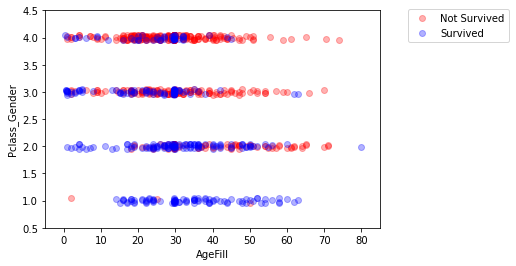

In [38]:
np.random.seed = 0

xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5

index_survived = titanic_df[titanic_df["Survived"]==0].index
index_notsurvived = titanic_df[titanic_df["Survived"]==1].index

from matplotlib.colors import ListedColormap
fig, ax = plt.subplots()
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)
ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.legend(bbox_to_anchor=(1.4, 1.03))

In [40]:
#運賃だけのリストを作成
data2 = titanic_df.loc[:, ["AgeFill", "Pclass_Gender"]].values
data2

array([[22.        ,  4.        ],
       [38.        ,  1.        ],
       [26.        ,  3.        ],
       ...,
       [29.69911765,  3.        ],
       [26.        ,  2.        ],
       [32.        ,  4.        ]])

In [41]:
#生死フラグのみのリストを作成
label2 =  titanic_df.loc[:,["Survived"]].values

In [42]:
model2 = LogisticRegression()
model2.fit(data2, label2)

LogisticRegression()

In [44]:
model2.predict([[10,1]])

array([1], dtype=int64)

In [45]:
model2.predict_proba([[10,1]])

array([[0.03754749, 0.96245251]])

In [46]:
titanic_df.head(3)

,Survived,SibSp,Parch,Fare,Embarked,AgeFill,Pclass_Gender
0,0,1,0,7.2500,S,22.0,4
1,1,1,0,71.2833,C,38.0,1
2,1,0,0,7.9250,S,26.0,3


* <b>分類モデルの境界線をプロット。見た目いい感じに分類できているかどうかをチェック。

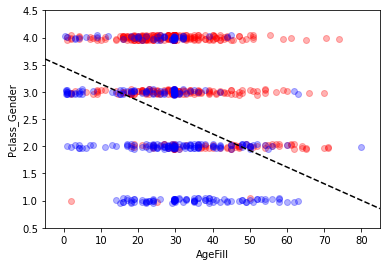

In [47]:
h = 0.02
xmin, xmax = -5, 85
ymin, ymax = 0.5, 4.5
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))
Z = model2.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
levels = np.linspace(0, 1.0)
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#contour = ax.contourf(xx, yy, Z, cmap=cm, levels=levels, alpha=0.5)

sc = ax.scatter(titanic_df.loc[index_survived, 'AgeFill'],
                titanic_df.loc[index_survived, 'Pclass_Gender']+(np.random.rand(len(index_survived))-0.5)*0.1,
                color='r', label='Not Survived', alpha=0.3)
sc = ax.scatter(titanic_df.loc[index_notsurvived, 'AgeFill'],
                titanic_df.loc[index_notsurvived, 'Pclass_Gender']+(np.random.rand(len(index_notsurvived))-0.5)*0.1,
                color='b', label='Survived', alpha=0.3)

ax.set_xlabel('AgeFill')
ax.set_ylabel('Pclass_Gender')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
#fig.colorbar(contour)

x1 = xmin
x2 = xmax
y1 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmin)/model2.coef_[0][1]
y2 = -1*(model2.intercept_[0]+model2.coef_[0][0]*xmax)/model2.coef_[0][1]
ax.plot([x1, x2] ,[y1, y2], 'k--')

#### <b>2. モデル評価

* <b>混同行列とクロスバリデーション

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
traindata1, testdata1, trainlabel1, testlabel1 = train_test_split(data1, label1, test_size=0.2)
traindata1.shape
trainlabel1.shape

(712, 1)

In [50]:
traindata2, testdata2, trainlabel2, testlabel2 = train_test_split(data2, label2, test_size=0.2)
traindata2.shape
trainlabel2.shape
#本来は同じデータセットを分割しなければいけない。(簡易的に別々に分割している。)

(712, 1)

In [51]:
data = titanic_df.loc[:, ].values
label =  titanic_df.loc[:,["Survived"]].values
traindata, testdata, trainlabel, testlabel = train_test_split(data, label, test_size=0.2)
traindata.shape
trainlabel.shape

(712, 1)

In [52]:
eval_model1=LogisticRegression()
eval_model2=LogisticRegression()
#eval_model=LogisticRegression()

In [53]:
predictor_eval1=eval_model1.fit(traindata1, trainlabel1).predict(testdata1)
predictor_eval2=eval_model2.fit(traindata2, trainlabel2).predict(testdata2)
#predictor_eval=eval_model.fit(traindata, trainlabel).predict(testdata)

In [54]:
eval_model1.score(traindata1, trainlabel1)

0.6713483146067416

In [55]:
eval_model1.score(testdata1,testlabel1)

0.6871508379888268

In [56]:
eval_model2.score(traindata2, trainlabel2)

0.7907303370786517

In [57]:
eval_model2.score(testdata2,testlabel2)

0.7094972067039106

In [58]:
from sklearn import metrics
print(metrics.classification_report(testlabel1, predictor_eval1))
print(metrics.classification_report(testlabel2, predictor_eval2))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       117
           1       0.61      0.27      0.38        62

    accuracy                           0.69       179
   macro avg       0.65      0.59      0.58       179
weighted avg       0.67      0.69      0.65       179

              precision    recall  f1-score   support

           0       0.72      0.83      0.77       107
           1       0.68      0.53      0.59        72

    accuracy                           0.71       179
   macro avg       0.70      0.68      0.68       179
weighted avg       0.71      0.71      0.70       179



In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix1=confusion_matrix(testlabel1, predictor_eval1)
confusion_matrix2=confusion_matrix(testlabel2, predictor_eval2)

In [60]:
confusion_matrix1

array([[106,  11],
       [ 45,  17]], dtype=int64)

In [61]:
confusion_matrix2

array([[89, 18],
       [34, 38]], dtype=int64)

<AxesSubplot:>

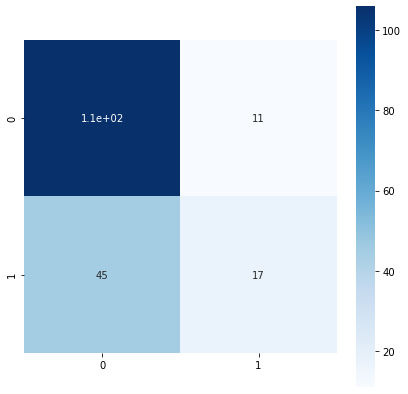

In [62]:
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix1,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

<AxesSubplot:>

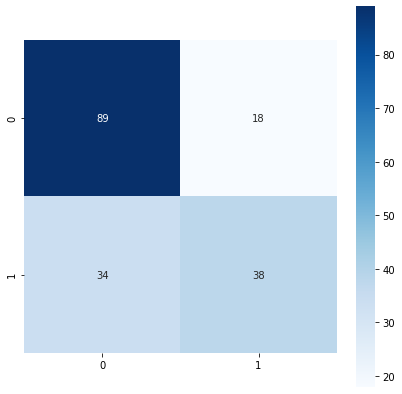

In [63]:
fig = plt.figure(figsize = (7,7))
#plt.title(title)
sns.heatmap(
    confusion_matrix2,
    vmin=None,
    vmax=None,
    cmap="Blues",
    center=None,
    robust=False,
    annot=True, fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=True, ax=None, 
    #xticklabels=columns,
    #yticklabels=columns,
    mask=None)

In [65]:
warnings.simplefilter('ignore')

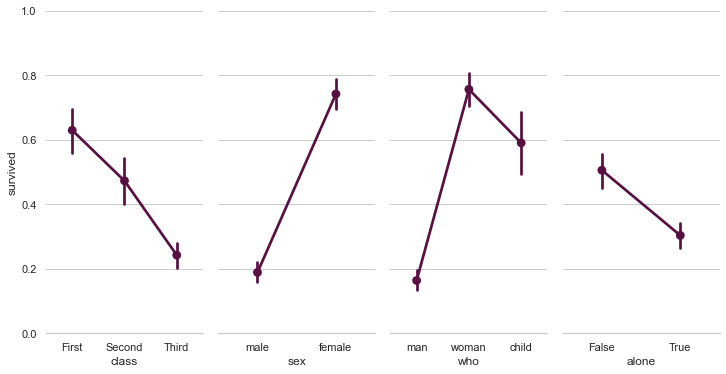

In [66]:
#Paired categorical plots

import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Set up a grid to plot survival probability against several variables
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 size=5, aspect=.5)

# Draw a seaborn pointplot onto each Axes
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))
sns.despine(fig=g.fig, left=True)

plt.show()

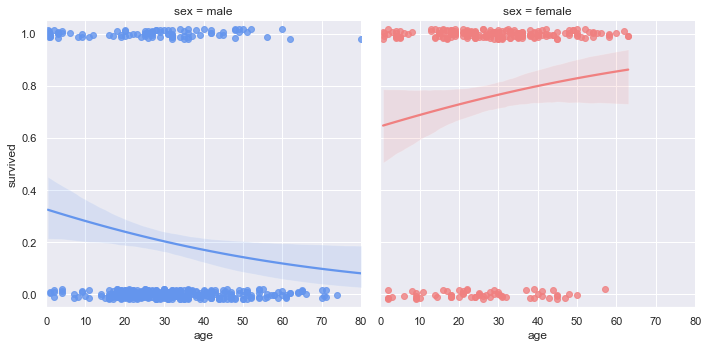

In [73]:
#Faceted logistic regression

import seaborn as sns
sns.set(style="darkgrid")

# Load the example titanic dataset
df = sns.load_dataset("titanic")

# Make a custom palette with gendered colors
pal = dict(male="#6495ED", female="#F08080")

# Show the survival proability as a function of age and sex
g = sns.lmplot(x="age", y="survived", col="sex", hue="sex", data=df,
               palette=pal, y_jitter=.02, logistic=True)
g.set(xlim=(0, 80), ylim=(-.05, 1.05))
plt.show()

<b>【参考図書】</b>

* ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p97-98

## <b>第4章 主成分分析

<b>要点まとめ</b>

<b>主成分分析は、多くの変数がある場合にそれをごく少数の（たいていは1～3の）項目に置き換えることにより、データを解釈しやすくする手法（たとえば、「身長」と「体重」から「BMI」という指標をつくり「肥満度」を評価しやすくすることなども広義の主成分分析に相当する）。具体的には、主成分を与える変換は第一主成分の分散を最大化し、続く主成分はそれまでに決定した主成分と直交するという拘束条件の下で分散を最大化するようにして選ばれる。</b>

* 主成分分析・・・多変量データをより少数の指標に圧縮する。ラグランジュ関数を微分して最適解を求める。
* 寄与率・・・第k主成分の分散の全分散に対する割合（第k主成分が持つ情報量の割合）
* 累積寄与率・・・第1-k主成分まで圧縮した際の情報損失量の割合。

### <b>主成分分析ハンズオン

#### <b>a. 乳がんデータの分析

* 設定
 * 乳がん検査データを利用しロジスティック回帰モデルを作成
 * 主成分を利用し2次元空間上に次元圧縮
<br><br>
* 課題
 * 32次元のデータを2次元上に次元圧縮した際に、うまく判別できるかを確認

| | |
| --- | --- |
| データセット名 | 乳がん検査データ |
| レコード数 | 569 |
| カラム数 | 33 |
| 詳細 | scikit learn |
| 備考 |  |

#### <b>0. モジュールインポート～データ読み込み～不要データドロップ

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

* <b>csvファイルを読み込んで先頭5行を表示し中身を確認

In [75]:
cancer_df = pd.read_csv('cancer.csv')
cancer_df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


* <b>不要データ（Unnamed）を削除

* <b>diagnosis: 診断結果 (良性がB / 悪性がM)。説明変数は3列以降、目的変数を2列目としロジスティック回帰で分類。

In [76]:
cancer_df.drop('Unnamed: 32', axis=1, inplace=True)
cancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### <b>1. 主成分分析

* <b>実装

In [77]:
# 目的変数の抽出
y = cancer_df.diagnosis.apply(lambda d: 1 if d == 'M' else 0)

In [78]:
# 説明変数の抽出
X = cancer_df.loc[:, 'radius_mean':]

In [79]:
# 学習用とテスト用でデータを分離
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰で学習
logistic = LogisticRegressionCV(cv=10, random_state=0)
logistic.fit(X_train_scaled, y_train)

# 検証
print('Train score: {:.3f}'.format(logistic.score(X_train_scaled, y_train)))
print('Test score: {:.3f}'.format(logistic.score(X_test_scaled, y_test)))
print('Confustion matrix:\n{}'.format(confusion_matrix(y_true=y_test, y_pred=logistic.predict(X_test_scaled))))

Train score: 0.988
Test score: 0.972
Confustion matrix:
[[89  1]
 [ 3 50]]


* <b>検証スコア97％で分類できることを確認

* <b>第1, 第2主成分だけでも6割以上の説明力があることが分かる。

<BarContainer object of 30 artists>

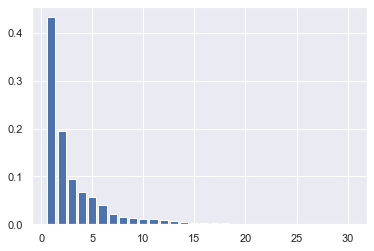

In [80]:
pca = PCA(n_components=30)
pca.fit(X_train_scaled)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

X_train_pca shape: (426, 2)
explained variance ratio: [0.43315126 0.19586506]


Text(0, 0.5, 'PC 2')

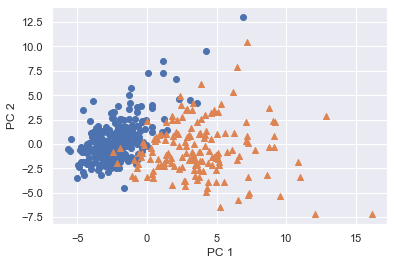

In [81]:
# PCA
# 次元数2まで圧縮
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
print('X_train_pca shape: {}'.format(X_train_pca.shape))
# X_train_pca shape: (426, 2)

# 寄与率
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
# explained variance ratio: [ 0.43315126  0.19586506]

# 散布図にプロット
temp = pd.DataFrame(X_train_pca)
temp['Outcome'] = y_train.values
b = temp[temp['Outcome'] == 0]
m = temp[temp['Outcome'] == 1]
plt.scatter(x=b[0], y=b[1], marker='o') # 良性は○でマーク
plt.scatter(x=m[0], y=m[1], marker='^') # 悪性は△でマーク
plt.xlabel('PC 1') # 第1主成分をx軸
plt.ylabel('PC 2') # 第2主成分をy軸

<b>【参考図書】</b>

* ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p105,p199

## <b>第5章 アルゴリズム

<b>要点まとめ<b>

<b>k近傍法(k-nearest neighbor :k-NN)は教師あり学習における分類タスクを行うアルゴリズムであり、k平均法(k-means clustering)は教師なし学習におけるクラスタリングタスクを行うアルゴリズム。k近傍法は与えられた学習データをベクトル空間上にプロットしておき、未知のデータが得られたらそこから距離が近い順に任意のk個を取得し、その多数決でデータが属するクラスを推定する。一方k平均法は、まずデータを適当なクラスタに分けた後、クラスタの平均を用いてデータがうまく分かれるように調整させていくアルゴリズムである。</b>

### <b>k近傍法（kNN）ハンズオン

* 設定
 * 人口データを分類
<br><br>
* 課題
 * 人口データと分類結果のプロット

| | |
| --- | --- |
| データセット名 | 人口データ |
| レコード数 | |
| カラム数 | |
| 詳細 | |
| 備考 | |

* <b>モジュールインポート

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

* <b>訓練データ生成

In [83]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

* <b>データプロット

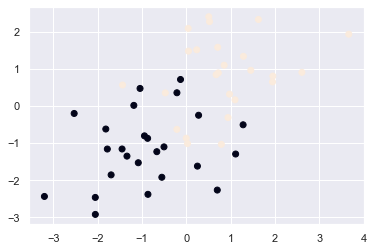

In [84]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

* <b>予測するデータ点との、距離が最も近いk個の、訓練データのラベルの最頻値を割り当てる

In [85]:
def distance(x1, x2):
    return np.sum((x1 - x2)**2, axis=1)

def knc_predict(n_neighbors, x_train, y_train, X_test):
    y_pred = np.empty(len(X_test), dtype=y_train.dtype)
    for i, x in enumerate(X_test):
        distances = distance(x, X_train)
        nearest_index = distances.argsort()[:n_neighbors]
        mode, _ = stats.mode(y_train[nearest_index])
        y_pred[i] = mode
    return y_pred

def plt_resut(x_train, y_train, y_pred):
    xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
    xx = np.array([xx0, xx1]).reshape(2, -1).T
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    plt.contourf(xx0, xx1, y_pred.reshape(100, 100).astype(dtype=np.float), alpha=0.2, levels=np.linspace(0, 1, 3))

* <b>予測結果可視化

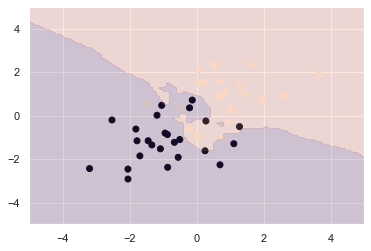

In [86]:
n_neighbors = 3

xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X_test = np.array([xx0, xx1]).reshape(2, -1).T

y_pred = knc_predict(n_neighbors, X_train, ys_train, X_test)
plt_resut(X_train, ys_train, y_pred)

### <b>k平均法（k-means）のアルゴリズム

 1) 各クラスタ中心の初期値を設定する<br>
 2) 各データ点に対して、各クラスタ中心との距離を計算し、最も距離が近いクラスタを割り当てる<br>
 3) 各クラスタの平均ベクトル（中心）を計算する<br>
 4) 収束するまで2, 3の処理を繰り返す

<b>【参考図書】</b>

* ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p104

## <b>第6章は範囲対象外のため割愛

## <b>第7章 サポートベクターマシン

<b>要点まとめ<b>

<b>サポートベクターマシン (Support Vector Machine, SVM) は、教師あり学習の「分類」タスクを行うためのアルゴリズムであり、データを分類する境界線を引くための手法。各データ点との距離（マージン）が最大となるような境界線を求めることによりパターン分類を行う。高次元データの場合、データをあえて高次元に写像することで写像後の空間で線形分類できるようにするというアプローチが取られており、この写像関数をカーネル関数という。</b>

### <b>サポートベクターマシンハンズオン

* <b>モジュールインポート

In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

* <b>訓練データ生成① （線形分離可能）

In [88]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2.
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2.
    X_train = np.concatenate([x0, x1])
    ys_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return X_train, ys_train

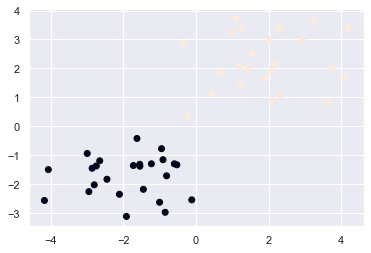

In [89]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

* <b>学習

In [90]:
t = np.where(ys_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

eta1 = 0.01
eta2 = 0.001
n_iter = 500

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

* <b>予測

In [91]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [92]:
xx0, xx1 = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

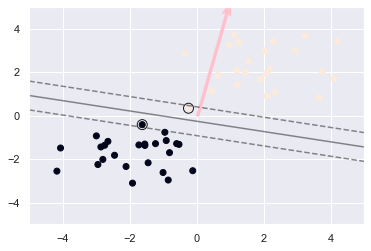

In [93]:
# 訓練データを可視化
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
#plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


# マージンと決定境界を可視化
plt.quiver(0, 0, 0.1, 0.35, width=0.01, scale=1, color='pink')

* <b>訓練データ生成② （線形分離不可能）

In [94]:
factor = .2
n_samples = 50
linspace = np.linspace(0, 2 * np.pi, n_samples // 2 + 1)[:-1]
outer_circ_x = np.cos(linspace)
outer_circ_y = np.sin(linspace)
inner_circ_x = outer_circ_x * factor
inner_circ_y = outer_circ_y * factor

X = np.vstack((np.append(outer_circ_x, inner_circ_x),
               np.append(outer_circ_y, inner_circ_y))).T
y = np.hstack([np.zeros(n_samples // 2, dtype=np.intp),
               np.ones(n_samples // 2, dtype=np.intp)])
X += np.random.normal(scale=0.15, size=X.shape)
x_train = X
y_train = y

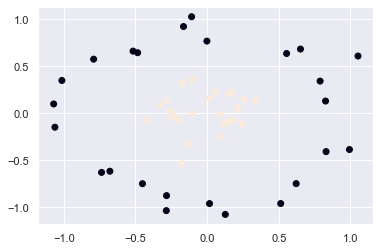

In [95]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

* <b>学習

* <b>元のデータ空間では線形分離は出来ないが、特徴空間上で線形分離することを考える。今回はカーネルとしてRBFカーネル（ガウシアンカーネル）を利用する。

In [96]:
def rbf(u, v):
        sigma = 0.8
        return np.exp(-0.5 * ((u - v)**2).sum() / sigma**2)
    
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# RBFカーネル
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = rbf(X_train[i], X_train[j])

eta1 = 0.01
eta2 = 0.001
n_iter = 5000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.where(a > 0, a, 0)

* <b>予測

In [97]:
index = a > 1e-6
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [98]:
xx0, xx1 = np.meshgrid(np.linspace(-1.5, 1.5, 100), np.linspace(-1.5, 1.5, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * rbf(X_test[i], sv)
y_pred = np.sign(y_project)

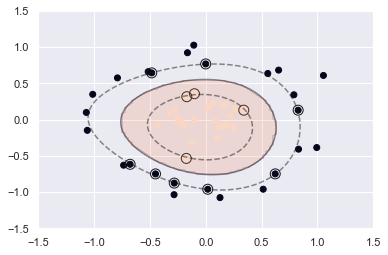

In [99]:
# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

* <b>ソフトマージンSVM

* <b>訓練データ生成③（重なりあり）

In [100]:
x0 = np.random.normal(size=50).reshape(-1, 2) - 1.
x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
x_train = np.concatenate([x0, x1])
y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

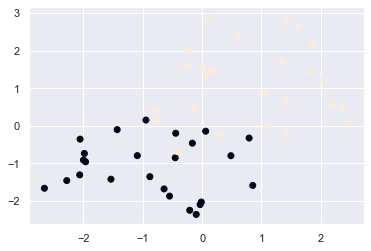

In [101]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)

* <b>学習

* <b>分離不可能な場合は学習できないが、データ点がマージン内部に入ることや誤分類を許容することでその問題を回避する。

In [102]:
X_train = x_train
t = np.where(y_train == 1.0, 1.0, -1.0)

n_samples = len(X_train)
# 線形カーネル
K = X_train.dot(X_train.T)

C = 1
eta1 = 0.01
eta2 = 0.001
n_iter = 1000

H = np.outer(t, t) * K

a = np.ones(n_samples)
for _ in range(n_iter):
    grad = 1 - H.dot(a)
    a += eta1 * grad
    a -= eta2 * a.dot(t) * t
    a = np.clip(a, 0, C)

* <b>予測

In [103]:
index = a > 1e-8
support_vectors = X_train[index]
support_vector_t = t[index]
support_vector_a = a[index]

term2 = K[index][:, index].dot(support_vector_a * support_vector_t)
b = (support_vector_t - term2).mean()

In [104]:
xx0, xx1 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
xx = np.array([xx0, xx1]).reshape(2, -1).T

X_test = xx
y_project = np.ones(len(X_test)) * b
for i in range(len(X_test)):
    for a, sv_t, sv in zip(support_vector_a, support_vector_t, support_vectors):
        y_project[i] += a * sv_t * sv.dot(X_test[i])
y_pred = np.sign(y_project)

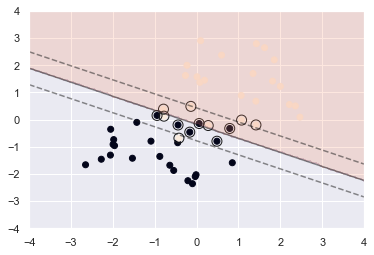

In [105]:
# 訓練データを可視化
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
# サポートベクトルを可視化
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
                    s=100, facecolors='none', edgecolors='k')
# 領域を可視化
plt.contourf(xx0, xx1, y_pred.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# マージンと決定境界を可視化
plt.contour(xx0, xx1, y_project.reshape(100, 100), colors='k',
                     levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

* <b> Irisデータセットを用いたSVMの実装例

In [106]:
from sklearn.datasets import load_iris

In [107]:
iris_dataset = load_iris()
from pandas import DataFrame
iris_data = DataFrame(iris_dataset.data)
iris_data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [108]:
iris_data.columns = iris_dataset.feature_names
print(iris_data.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [109]:
iris_data.shape

(150, 4)

In [110]:
y = DataFrame(iris_dataset.target)

In [111]:
SepalLength = DataFrame(iris_data['sepal length (cm)'])
SepalWidth  = DataFrame(iris_data['sepal width (cm)'])
PetalLength = DataFrame(iris_data['petal length (cm)'])
PetalWidth  = DataFrame(iris_data['petal width (cm)'])

In [112]:
import pandas as pd
x = pd.concat([SepalLength, SepalWidth, PetalLength, PetalWidth], axis=1)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, shuffle = True)

In [114]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 学習する
clf = SVC()
clf.fit(x_train, y_train)

# 評価する
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9666666666666667

<b>【参考文献】</b>

* ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p101